# Titanic Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df=pd.read_csv("tested.csv")

## Display Data

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
#Note :  target survived =1 and dead=0

## Display Information and 5 point Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [9]:
# create Shallow Copy
df1=df.copy()

## Check Shape and Size of Data

In [10]:
df1.shape

(418, 12)

In [11]:
df1.size

5016

In [12]:
# display all columns Datatypes
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# Drop unnecessary column
df1=df1.drop(["Cabin"],axis=1)

In [14]:
# check Null Values
df1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [15]:
# Drop Null Values
df1.dropna(inplace=True)

In [16]:
# Check Null Values
df1.isnull().sum().sum()

0

In [17]:
# Check all columns Data Types
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Label Encoding

In [18]:
# Import
from sklearn.preprocessing import LabelEncoder

In [19]:
# Object Creation
le=LabelEncoder()

In [20]:
df1["Name"]=le.fit_transform(df1["Name"])
df1["Sex"]=le.fit_transform(df1["Sex"])
df1["Ticket"]=le.fit_transform(df1["Ticket"])
df1["Embarked"]=le.fit_transform(df1["Embarked"])

In [21]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked         int32
dtype: object

In [22]:
# convert float datype to int
df1["Age"]=df1["Age"].astype("int")
df1["Fare"]=df1["Fare"].astype("int")

In [23]:
df1.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Name           int32
Sex            int32
Age            int32
SibSp          int64
Parch          int64
Ticket         int32
Fare           int32
Embarked       int32
dtype: object

## Outliers

In [24]:
# check Outliers using Boxplot

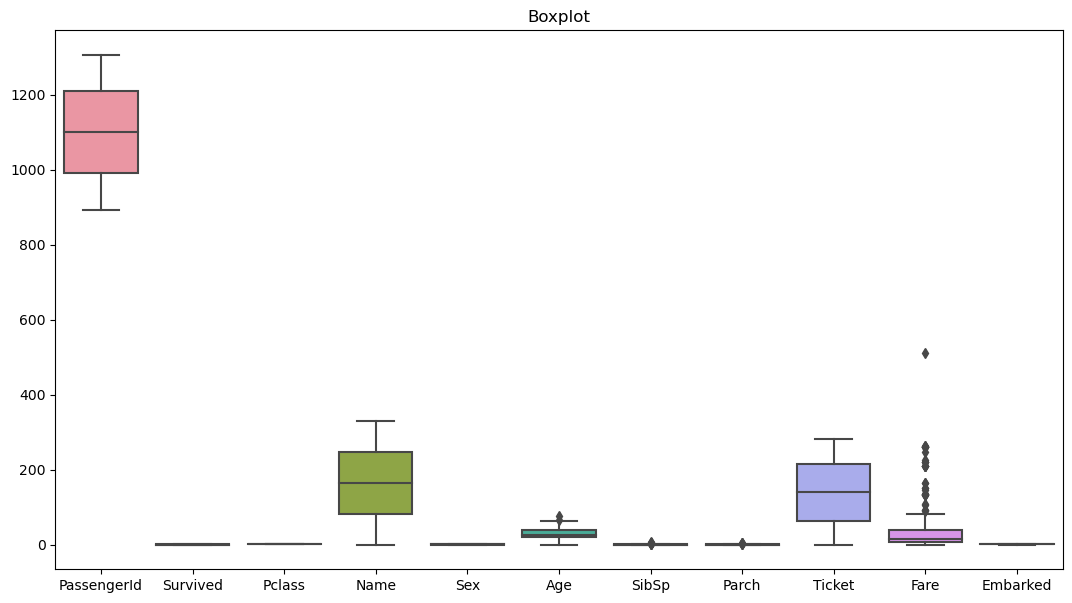

In [25]:
plt.figure(figsize=(13,7))
sns.boxplot(df1)
plt.title("Boxplot")
plt.show()

### Remove Outliers

#### 1. Find Q1, Q3 and IQR

In [26]:
Q3=df1.quantile(q=0.75)
Q1=df1.quantile(q=0.25)

In [27]:
IQR=Q3-Q1

#### 2. Set limit Upper and Lower

In [28]:
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

#### 3. Remove Values which is above upper limit and lower limit below

In [29]:
df2=df1[~((df1>upper)|(df1<lower))]

#### 4. Check Outliers is remove or not

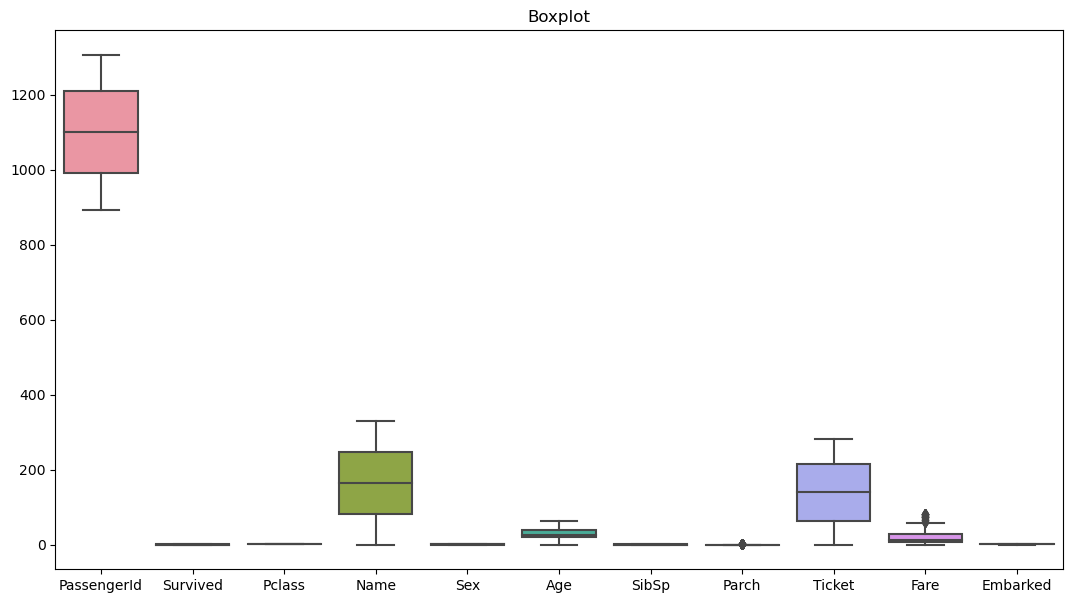

In [30]:
plt.figure(figsize=(13,7))
sns.boxplot(df2)
plt.title("Boxplot")
plt.show()

#### 5. Remove outliers is convert in null values

In [31]:
df2.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             2
SibSp          10
Parch           6
Ticket          0
Fare           34
Embarked        0
dtype: int64

#### 6. Remove Null Values

In [32]:
df2.dropna(inplace=True)

In [33]:
df2.isnull().sum().sum()

0

## Split Data X and Y

In [34]:
x=df2.drop(["Survived"],axis=1)

In [35]:
y=df2["Survived"]

## Scaling

In [36]:
from scipy.stats import zscore

In [37]:
x_sc=x.apply(zscore)

In [38]:
x_sc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.672562,0.944041,0.183156,0.754361,0.376629,-0.623219,-0.480847,-0.153647,-0.761924,-0.606528
1,-1.664422,0.944041,1.635472,-1.325625,1.362109,1.220470,-0.480847,0.493803,-0.761924,0.606528
2,-1.656282,-0.314680,0.588950,0.754361,2.499202,-0.623219,-0.480847,-0.947689,-0.662505,-0.606528
3,-1.648142,0.944041,1.678187,0.754361,-0.154015,-0.623219,-0.480847,-0.202511,-0.712214,0.606528
4,-1.640002,0.944041,-0.062456,-1.325625,-0.533046,1.220470,1.226160,-0.312455,-0.513376,0.606528


## Split Data into Training and Testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=1)

# Check Model score 

## 1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
lr.score(x_train,y_train)*100

100.0

In [45]:
lr.score(x_test,y_test)*100

100.0

In [46]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,f1_score

In [47]:
y_true,y_pred=y_test,lr.predict(x_test)

In [48]:
precision_score(y_true,y_pred)*100

100.0

In [49]:
recall_score(y_true,y_pred)*100

100.0

In [50]:
accuracy_score(y_true,y_pred)*100

100.0

In [51]:
f1_score(y_true,y_pred)*100

100.0

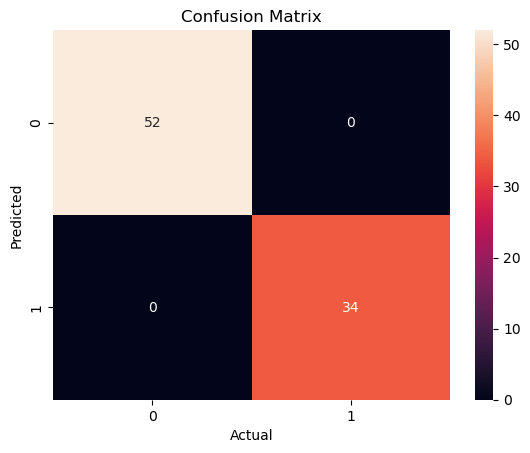

In [52]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## 2. Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc=DecisionTreeClassifier()

In [55]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
dtc.score(x_train,y_train)*100

100.0

In [57]:
dtc.score(x_test,y_test)*100

100.0

In [58]:
y_true,y_pred=y_test,dtc.predict(x_test)

In [59]:
precision_score(y_true,y_pred)*100

100.0

In [60]:
recall_score(y_true,y_pred)*100

100.0

In [61]:
accuracy_score(y_true,y_pred)*100

100.0

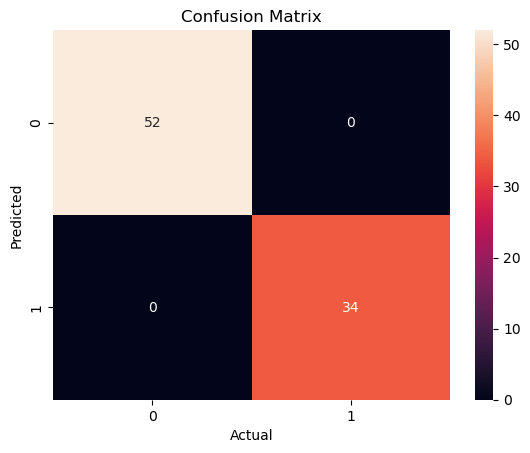

In [62]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## 3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
rfc.score(x_train,y_train)*100

100.0

In [67]:
rfc.score(x_test,y_test)*100

100.0

In [68]:
y_true,y_pred=y_test,rfc.predict(x_test)

In [69]:
precision_score(y_true,y_pred)*100

100.0

In [70]:
recall_score(y_true,y_pred)*100

100.0

In [71]:
accuracy_score(y_true,y_pred)*100

100.0

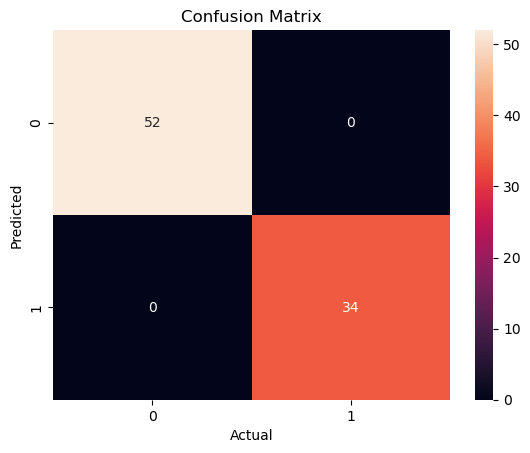

In [72]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## 4. SVC

In [73]:
from sklearn.svm import SVC

In [74]:
svc=SVC()

In [75]:
svc.fit(x_train,y_train)

SVC()

In [76]:
svc.score(x_train,y_train)*100

100.0

In [77]:
svc.score(x_test,y_test)*100

100.0

In [78]:
y_true,y_pred=y_test,svc.predict(x_test)

In [79]:
precision_score(y_true,y_pred)*100

100.0

In [80]:
recall_score(y_true,y_pred)*100

100.0

In [81]:
accuracy_score(y_true,y_pred)*100

100.0

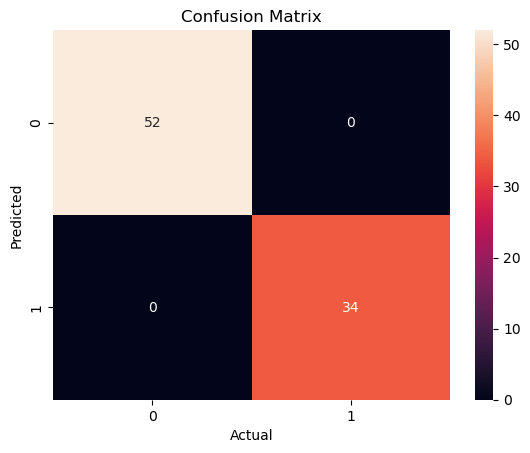

In [82]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## 5. K Neighbor Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier()

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
knn.score(x_train,y_train)*100

99.4949494949495

In [87]:
knn.score(x_test,y_test)*100

96.51162790697676

In [88]:
y_true,y_pred=y_test,knn.predict(x_test)

In [89]:
precision_score(y_true,y_pred)*100

100.0

In [90]:
recall_score(y_true,y_pred)*100

91.17647058823529

In [91]:
accuracy_score(y_true,y_pred)*100

96.51162790697676

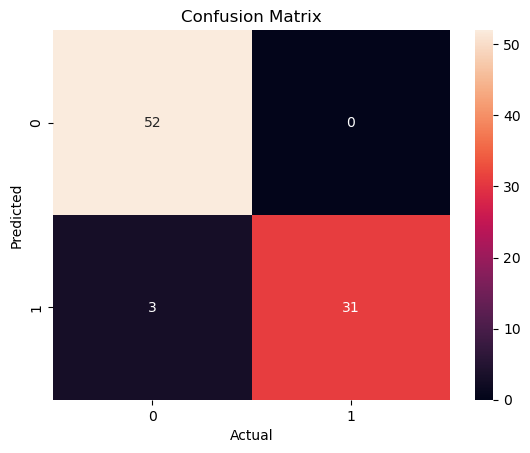

In [92]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Model Evaluation

In [93]:
model_evaluation=pd.DataFrame(data={"Algorithm":["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC Algorithm","KNN Algorithm"],
                                   "Training Score":[100,100,100,100,99.49],
                                   "Testing Score":[100,100,100,100,96.52],
                                   "Error":[0,0,0,0,2.97],
                                   "Accuracy":[100,100,100,100,96.51]})

In [94]:
model_evaluation

,Algorithm,Training Score,Testing Score,Error,Accuracy
0,Logistic Regression,100.00,100.00,0.00,100.00
1,Decision Tree Classifier,100.00,100.00,0.00,100.00
2,Random Forest Classifier,100.00,100.00,0.00,100.00
3,SVC Algorithm,100.00,100.00,0.00,100.00
4,KNN Algorithm,99.49,96.52,2.97,96.51


In [95]:
# here we can see all above model are fit for these dataset except KNN.